In [10]:
# Importing all Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import plotly.graph_objs as go
import plotly.subplots as sp
from scipy.stats import mstats
import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/life-expectancy-who-2024/Life Expectancy Data.csv


In [11]:
#Reading the dataset
df=pd.read_csv('/kaggle/input/life-expectancy-who-2024/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
#Size of the Dataset
df.shape

(2938, 22)

In [13]:
#Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [14]:
# Checking the number of Null Values in the dataset
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
# Replacing the Null Values with median values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median',fill_value=None)
df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [16]:
# Checking the number of Null Values in dataset after replacing them with median values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [17]:
#Stastical Analysis
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [18]:
#Displaying top 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
# Data exploration
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()

# Displaying first five rows of the correlation matrix
correlation_matrix.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899


Number of numerical columns: 21


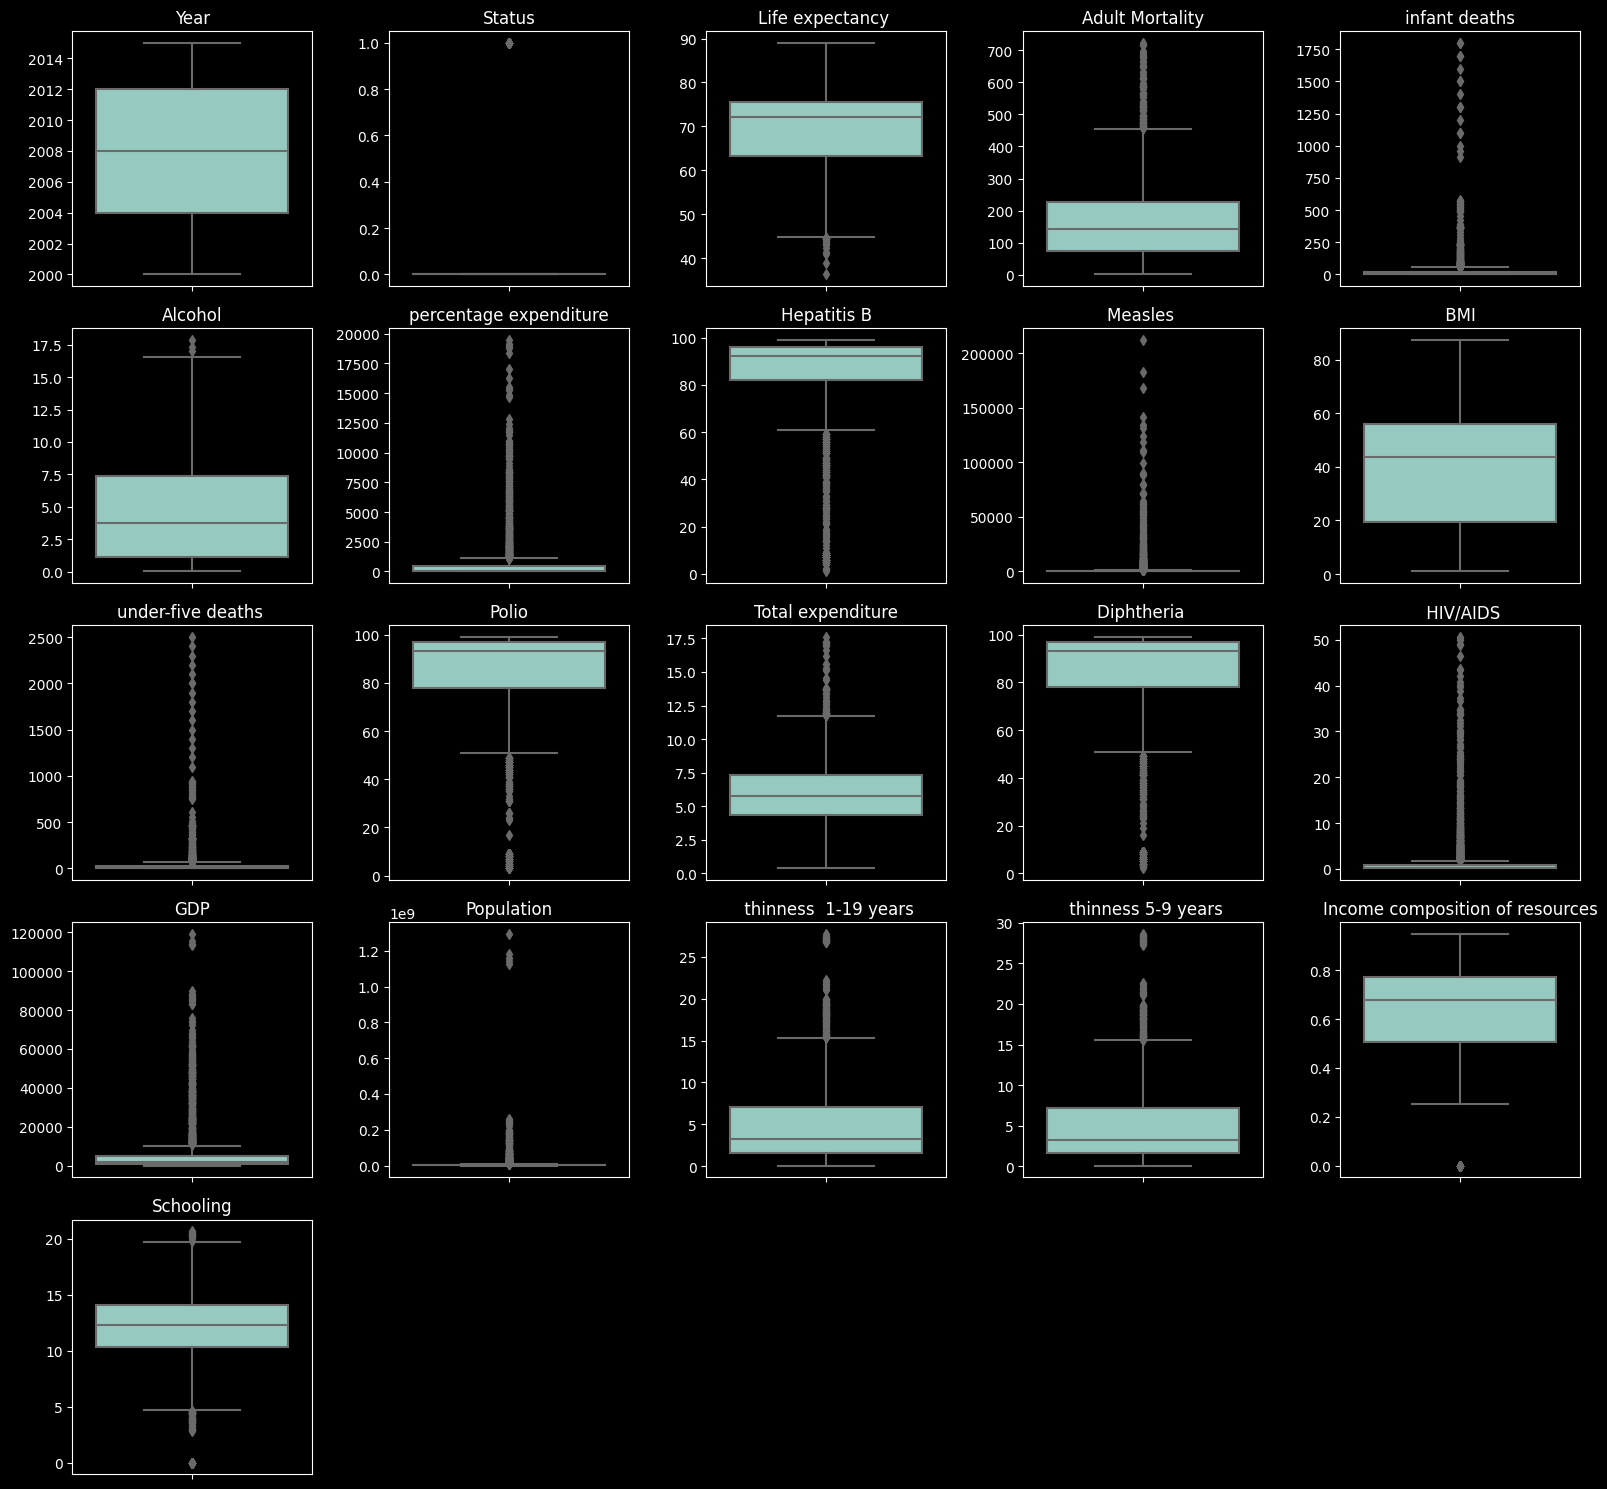

In [20]:
# Converting 'Status' column values to numerical
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})

# Selecting numerical columns for visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Checking if 'Country' is in the list and remove it if present
if 'Country' in numerical_cols:
    numerical_cols.remove('Country')


# Add 'Status' column to numerical columns only if it doesn't exist
if 'Status' not in numerical_cols:
    numerical_cols.append('Status')


# Check the number of numerical columns
num_cols = len(numerical_cols)
print(f'Number of numerical columns: {num_cols}')

# Create box plots for each numerical column
nrows = (num_cols // 5) + (num_cols % 5 > 0)  # Calculating required rows
plt.figure(figsize=(16, nrows * 3))  # Adjusting height based on number of rows
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, 5, i)  # Creating subplot based on calculated rows
    sns.boxplot(data=df, y=col)  # Using df for the box plot to include 'Status'
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()




In [21]:
# Convert 'Status' to numerical type
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})

# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check if 'Country' is in the list and remove it if present
if 'Country' in numerical_cols:
    numerical_cols.remove('Country')

# Add 'Status' column to numerical columns
numerical_cols.append('Status')  # Adding numerical 'Status' column

# Function to calculate outlier percentage for each numerical column
def calculate_outlier_percentage(data, columns):
    outlier_percentage = {}
    for col in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        # Calculate percentage of outliers
        total_count = data[col].shape[0]
        outlier_percentage[col] = (outlier_count / total_count) * 100
    
    return outlier_percentage

# Calculating outlier percentages for the numerical columns
outlier_percentages = calculate_outlier_percentage(df, numerical_cols)

# Printing the outlier percentages
for col, percentage in outlier_percentages.items():
    print(f'Outlier percentage for {col}: {percentage:.2f}%')

Outlier percentage for Year: 0.00%
Outlier percentage for Status: 0.00%
Outlier percentage for Life expectancy : 0.58%
Outlier percentage for Adult Mortality: 2.93%
Outlier percentage for infant deaths: 10.72%
Outlier percentage for Alcohol: 0.10%
Outlier percentage for percentage expenditure: 13.24%
Outlier percentage for Hepatitis B: 10.96%
Outlier percentage for Measles : 18.45%
Outlier percentage for  BMI : 0.00%
Outlier percentage for under-five deaths : 13.41%
Outlier percentage for Polio: 9.50%
Outlier percentage for Total expenditure: 1.74%
Outlier percentage for Diphtheria : 10.14%
Outlier percentage for  HIV/AIDS: 18.45%
Outlier percentage for GDP: 15.15%
Outlier percentage for Population: 15.38%
Outlier percentage for  thinness  1-19 years: 3.40%
Outlier percentage for  thinness 5-9 years: 3.37%
Outlier percentage for Income composition of resources: 4.42%
Outlier percentage for Schooling: 2.62%


Shape of DataFrame after Winsorization: (2938, 22)


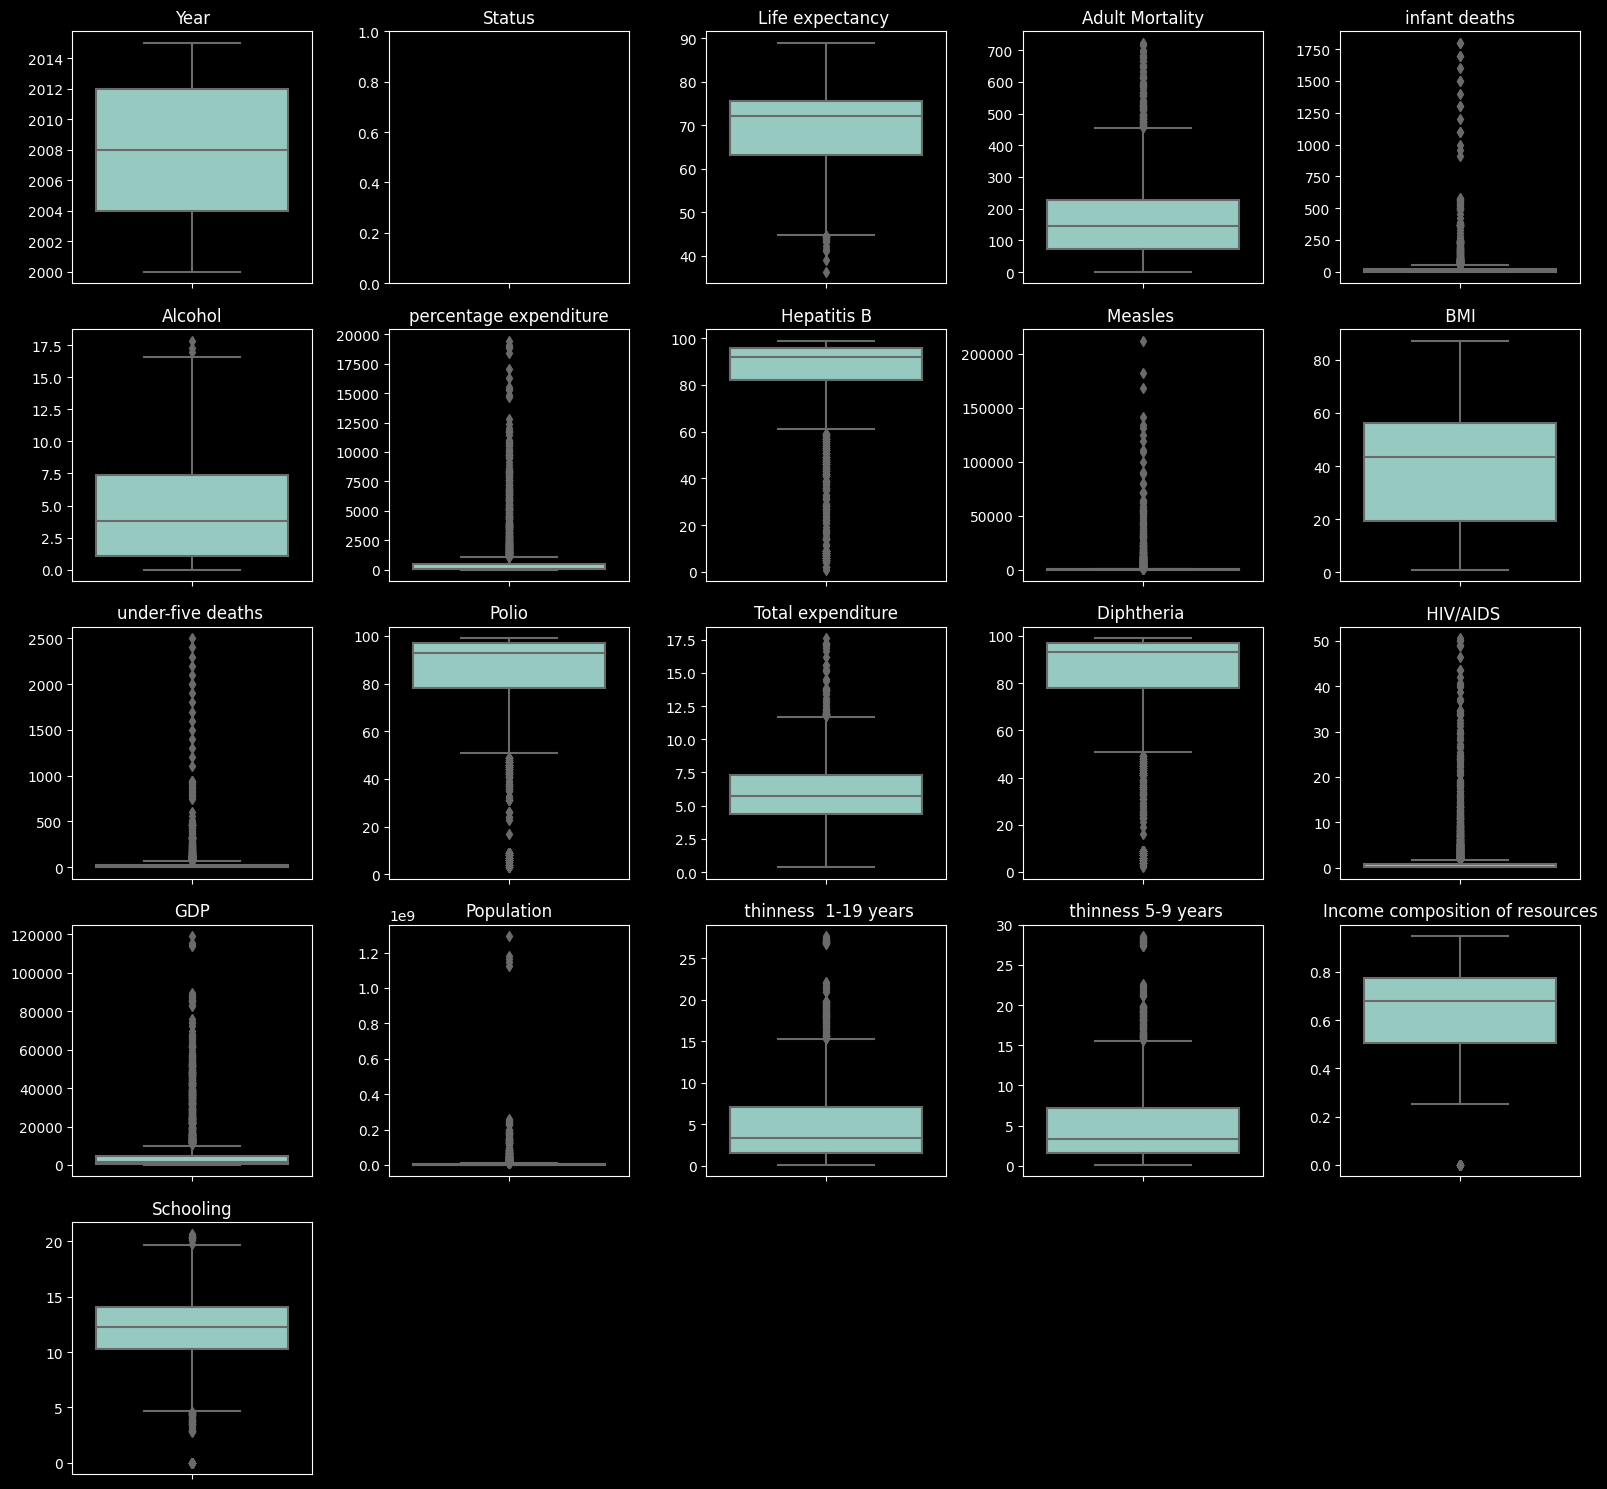

In [22]:
# Convert 'Status' to numerical type
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})

# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove 'Country' if it exists in the list
if 'Country' in numerical_cols:
    numerical_cols.remove('Country')

# Add 'Status' to numerical_cols if not already present
if 'Status' not in numerical_cols:
    numerical_cols.append('Status')  # Add 'Status' column

# Function to apply Winsorization directly on the DataFrame
def apply_winsorization_inplace(data, columns, limits):
    for status in data['Status'].unique():
        for col in columns:
            # Getting data for the current status group
            status_data = data[data['Status'] == status][col]
            
            if len(status_data) > 1:
                # Applying Winsorization and updating the original DataFrame
                data.loc[data['Status'] == status, col] = mstats.winsorize(status_data, limits=limits)

# Applying Winsorization to the DataFrame considering 'Status'
apply_winsorization_inplace(df, numerical_cols, limits=[0.05, 0.05])  # 5% limits on both ends

# Checking the shape of the original DataFrame (should be unchanged)
print(f'Shape of DataFrame after Winsorization: {df.shape}')

# Creating box plots for each numerical column in the modified DataFrame
nrows = (len(numerical_cols) // 5) + (len(numerical_cols) % 5 > 0)  # Calculate required rows
plt.figure(figsize=(16, nrows * 3))  # Adjust height based on number of rows
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, 5, i)  # Create subplot
    sns.boxplot(data=df, y=col)  # Box plot for the Winsorized DataFrame
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [23]:
# Function to apply Winsorization and update DataFrame
def apply_winsorization_inplace(data, columns, limits):
    for col in columns:
        data[col] = mstats.winsorize(data[col], limits=limits)

# Function to calculate outlier percentage for each numerical column
def calculate_outlier_percentage(data, columns):
    outlier_percentage = {}
    for col in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        # Calculate percentage of outliers
        total_count = data[col].shape[0]
        outlier_percentage[col] = (outlier_count / total_count) * 100
    
    return outlier_percentage

# Calculate outlier percentages before Winsorization
print("Outliers percentage before Winsorization:")
outlier_percentages_before = calculate_outlier_percentage(df, numerical_cols)
for col, percentage in outlier_percentages_before.items():
    print(f'Outlier percentage for {col} before Winsorization: {percentage:.2f}%')

# Apply Winsorization with 5% limits on both ends
apply_winsorization_inplace(df, numerical_cols, limits=[0.05, 0.05])

# Calculate outlier percentages after Winsorization
print("\nOutliers percentage after Winsorization:")
outlier_percentages_after = calculate_outlier_percentage(df, numerical_cols)
for col, percentage in outlier_percentages_after.items():
    print(f'Outlier percentage for {col} after Winsorization: {percentage:.2f}%')


Outliers percentage before Winsorization:
Outlier percentage for Year before Winsorization: 0.00%
Outlier percentage for Status before Winsorization: 0.00%
Outlier percentage for Life expectancy  before Winsorization: 0.58%
Outlier percentage for Adult Mortality before Winsorization: 2.93%
Outlier percentage for infant deaths before Winsorization: 10.72%
Outlier percentage for Alcohol before Winsorization: 0.10%
Outlier percentage for percentage expenditure before Winsorization: 13.24%
Outlier percentage for Hepatitis B before Winsorization: 10.96%
Outlier percentage for Measles  before Winsorization: 18.45%
Outlier percentage for  BMI  before Winsorization: 0.00%
Outlier percentage for under-five deaths  before Winsorization: 13.41%
Outlier percentage for Polio before Winsorization: 9.50%
Outlier percentage for Total expenditure before Winsorization: 1.74%
Outlier percentage for Diphtheria  before Winsorization: 10.14%
Outlier percentage for  HIV/AIDS before Winsorization: 18.45%
Outl

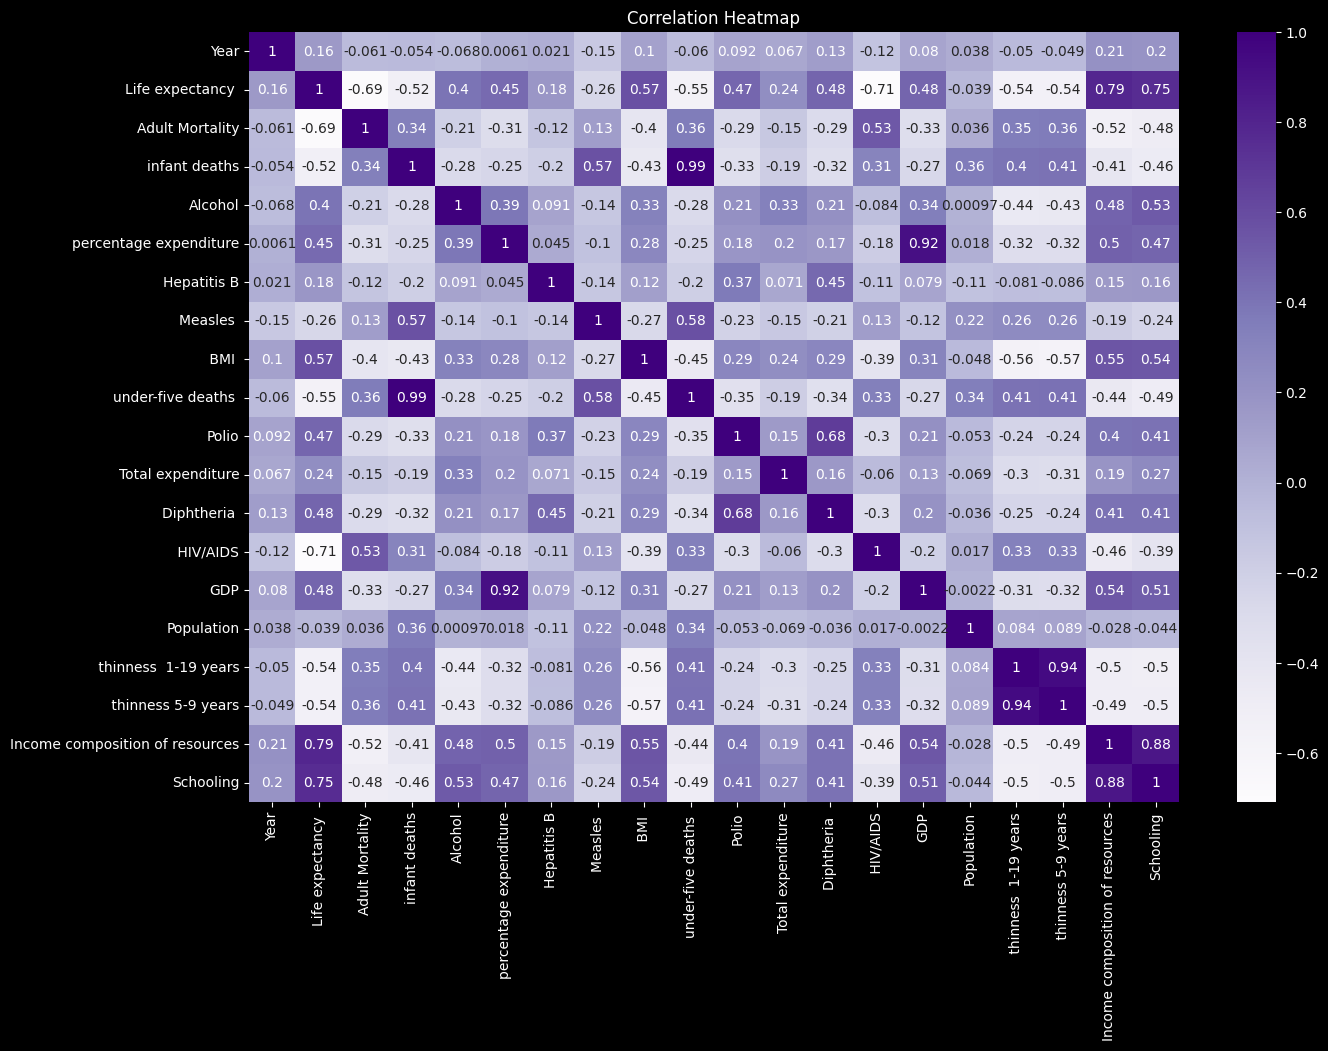

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Using One-hot encoding for the 'Status' column if it exists
if 'Status' in df.columns:
    # One-hot encode 'Status' and drop the original 'Status' column
    status_encoded = pd.get_dummies(df['Status'], prefix='Status', drop_first=True)
    # Concatenate the encoded status with numeric_df
    numeric_df = pd.concat([numeric_df.drop(columns=['Status']), status_encoded], axis=1)

# Ensure 'Year' column is present before reordering
if 'Year' in numeric_df.columns:
    year_index = numeric_df.columns.get_loc('Year')  # Get the index of 'Year'
    
    # Create a new column order
    new_column_order = (
        numeric_df.columns[:year_index + 1].tolist() +  # Add columns up to 'Year'
        [col for col in numeric_df.columns if col.startswith('Status')] +  # Add 'Status' columns
        [col for col in numeric_df.columns if col not in numeric_df.columns[:year_index + 1].tolist() and col.startswith('Status') == False]  # Remaining columns
    )
    
    # Reorder the DataFrame
    numeric_df = numeric_df[new_column_order]

# Generating the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Purples')
plt.title("Correlation Heatmap")
plt.show()


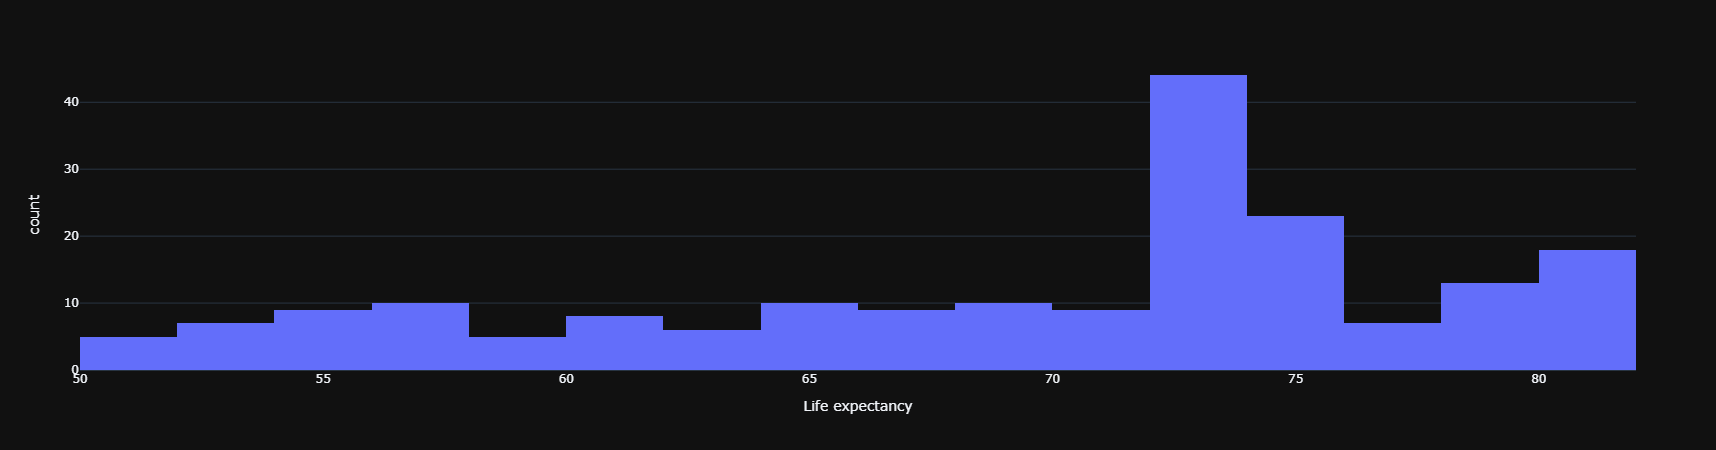

In [25]:
# Group by 'Country' and take the mean value of 'Life expectancy '
country_life_expectancy = df.groupby('Country')['Life expectancy '].mean()

# Plot the histogram for unique countries
fig = px.histogram(country_life_expectancy, x='Life expectancy ', nbins=30, template='plotly_dark')
fig.show()


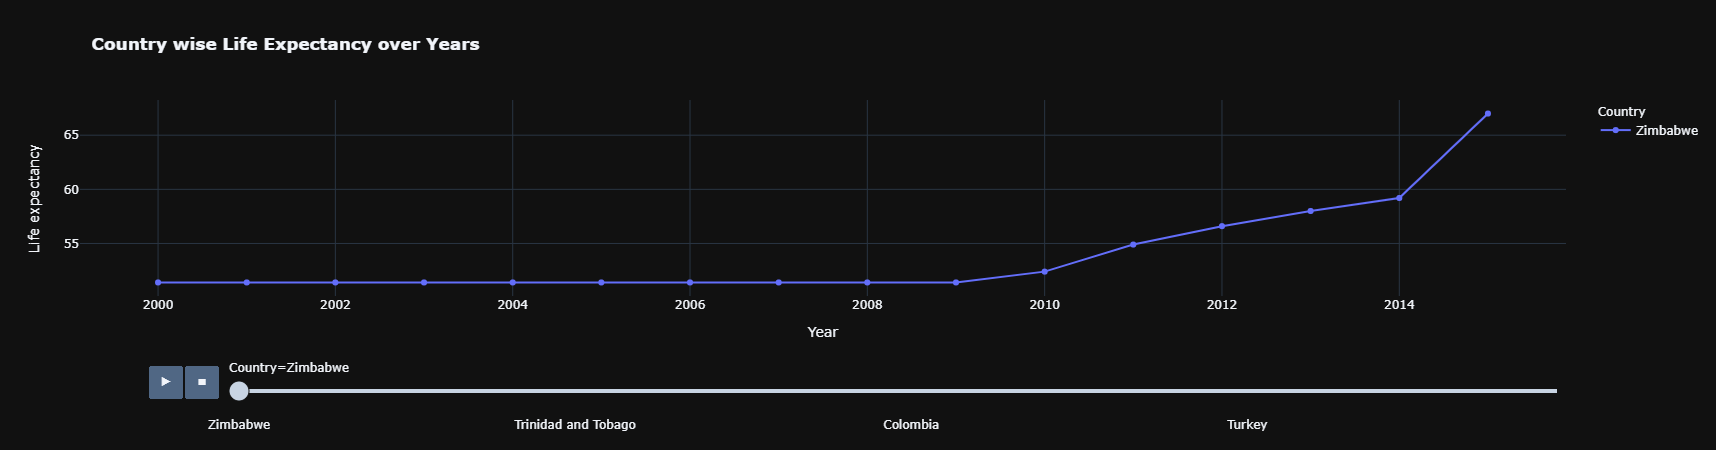

In [26]:
# Creating an animated line plot of life expectancy by country over the years
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

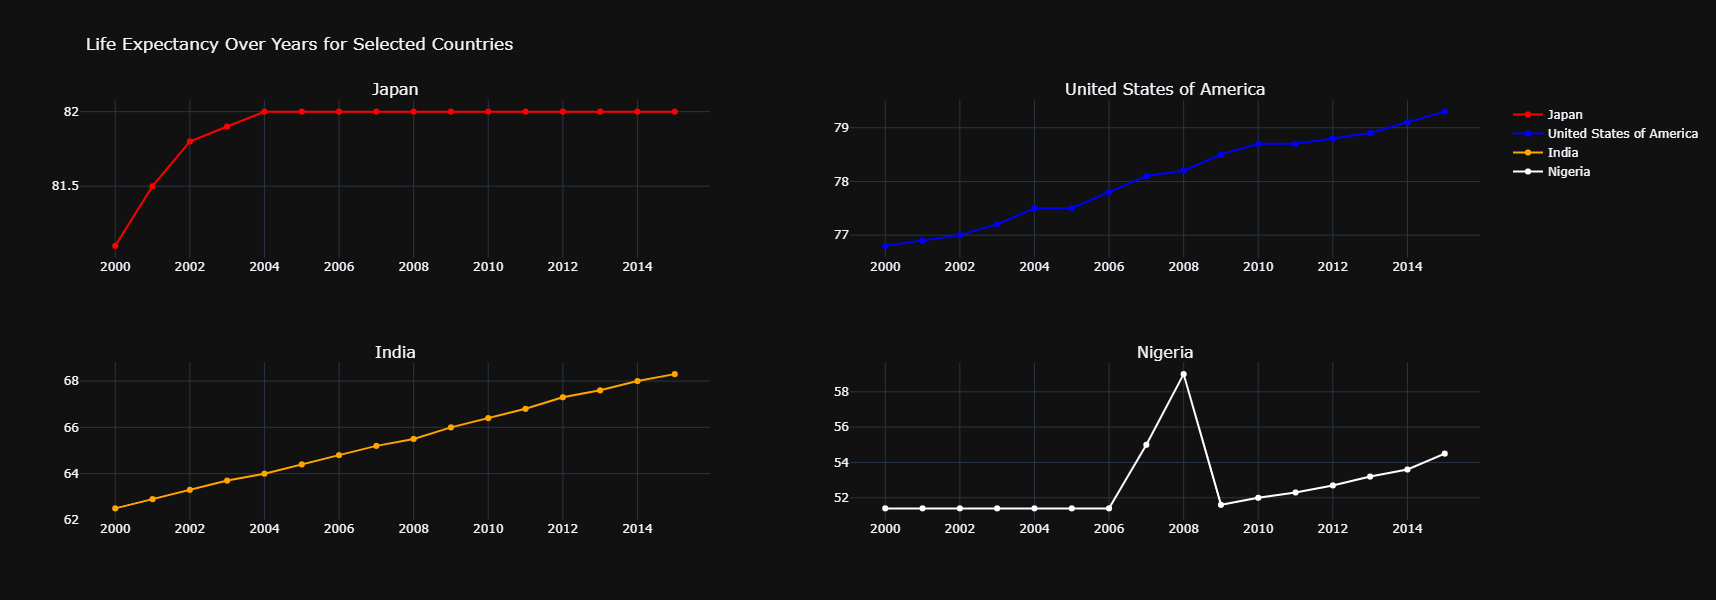

In [27]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the DataFrame for these countries
filtered_df = df[df['Country'].isin(developed_countries + developing_countries)]

# Creating a subplot with 2 rows and 2 columns
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=developed_countries + developing_countries)

# Defining colors for each country
colors = ['red', 'blue', 'orange', 'white']
country_labels = developed_countries + developing_countries

# Adding a line plot for each country with specific colors and both lines and markers
for i, country in enumerate(country_labels):
    country_data = filtered_df[filtered_df['Country'] == country]
    
    fig.add_trace(
        go.Scatter(
            x=country_data['Year'],
            y=country_data['Life expectancy '],
            mode='lines+markers',
            line=dict(color=colors[i]),
            name=country
        ),
        row=i // 2 + 1,  # Row index
        col=i % 2 + 1    # Column index
    )

# Updating layout parameters
fig.update_layout(
    height=600,       # Adjusting height
    width=700,        # Adjusting width
    title_text='Life Expectancy Over Years for Selected Countries',
    template='plotly_dark',
    showlegend=True,
)

# Show the plot
fig.show()


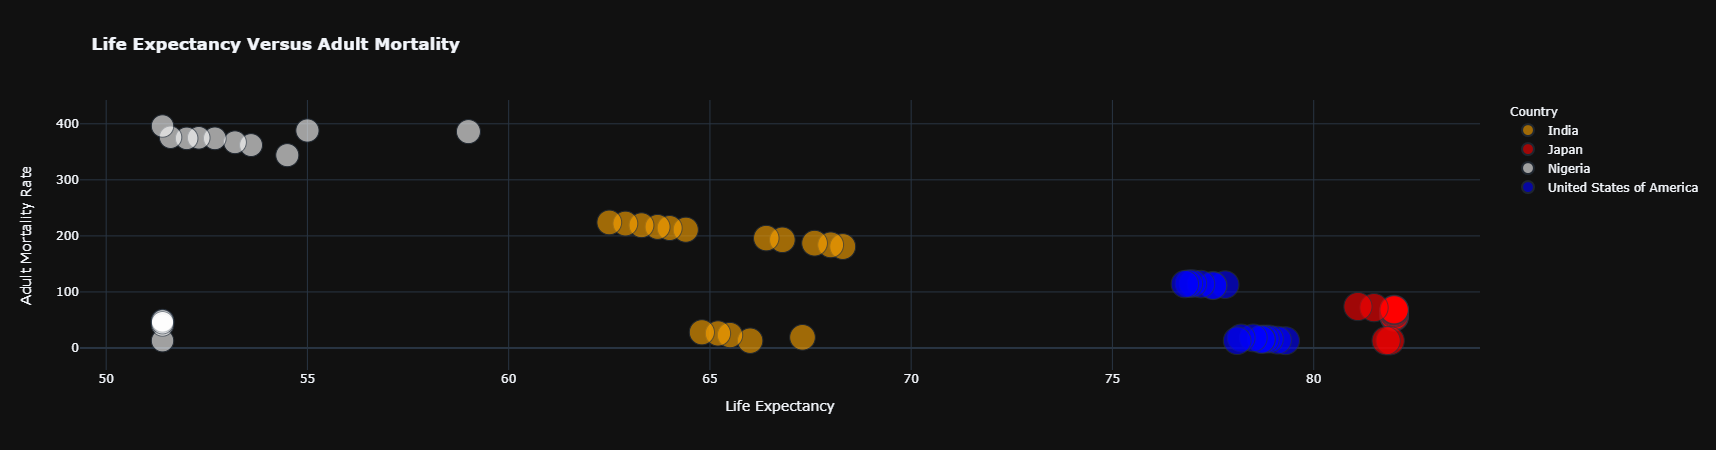

In [28]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the DataFrame for these countries
filtered_df = df[df['Country'].isin(developed_countries + developing_countries)]

# Defining custom colors for each country
custom_colors = ['orange', 'red', 'white', 'blue']

# Creating scatter plot for filtered countries with custom colors
fig = px.scatter(
    filtered_df,
    y='Adult Mortality',
    x='Life expectancy ',
    color='Country',
    size='Life expectancy ',
    color_discrete_sequence=custom_colors,
    template='plotly_dark',
    opacity=0.6,
    title='<b> Life Expectancy Versus Adult Mortality',
    labels={'Adult Mortality': 'Adult Mortality Rate', 'Life expectancy ': 'Life Expectancy'},
)

# Show the plot
fig.show()


<Axes: title={'center': 'General Government Expenditure on Health as a Percentage of Total Government Expenditure (%)'}, xlabel='Total Percentage', ylabel='Count'>

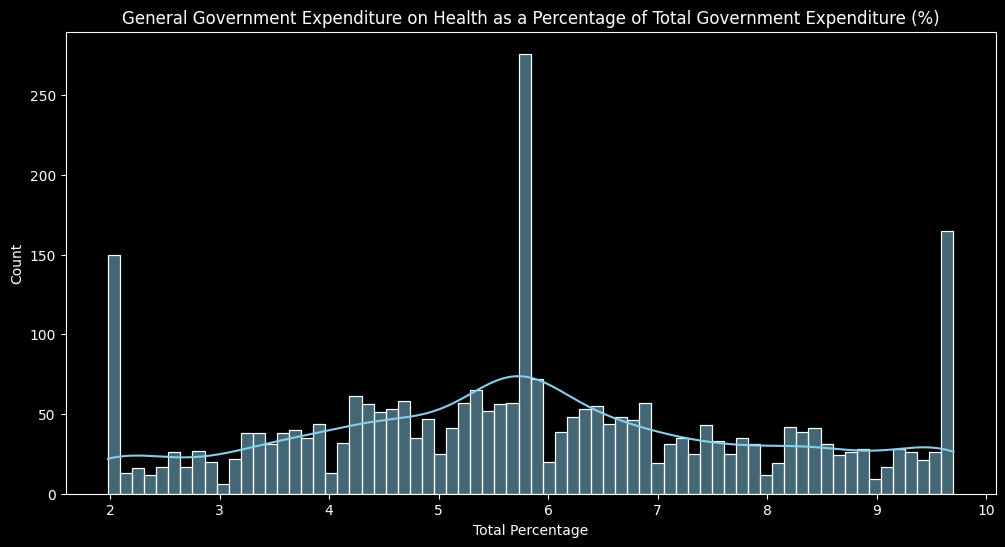

In [29]:
# Plotting a histogram of total government expenditure on health

plt.figure(figsize=(12, 6))
plt.title('General Government Expenditure on Health as a Percentage of Total Government Expenditure (%)')
plt.xlabel('Total Percentage')
plt.ylabel('Count')

sns.histplot(df, x='Total expenditure',bins=70, color='skyblue', kde=True)


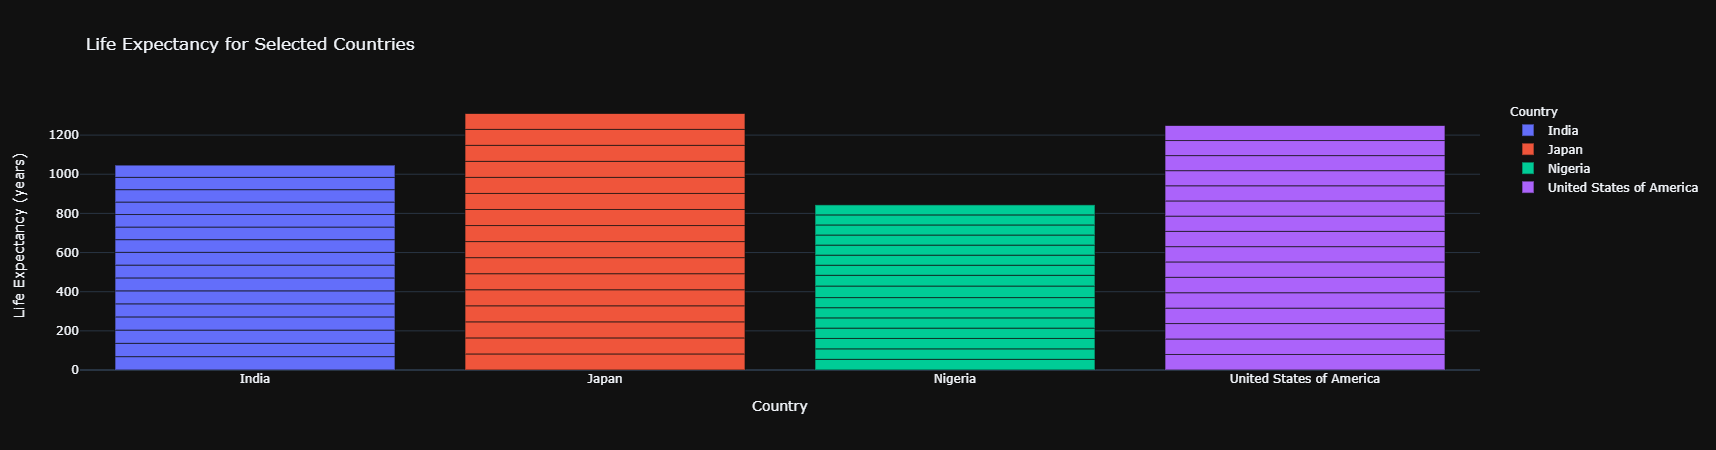

In [30]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the DataFrame for these countries
filtered_df = df[df['Country'].isin(developed_countries + developing_countries)]
# Creating a bar chart for life expectancy
fig = px.bar(
    filtered_df,
    x='Country',  # Categories on the x-axis
    y='Life expectancy ', 
    color='Country',  # Coloring by country
    template='plotly_dark',
    title='Life Expectancy for Selected Countries',
    labels={'Life expectancy ': 'Life Expectancy (years)', 'Country': 'Country'},
)

# Show the plot
fig.show()


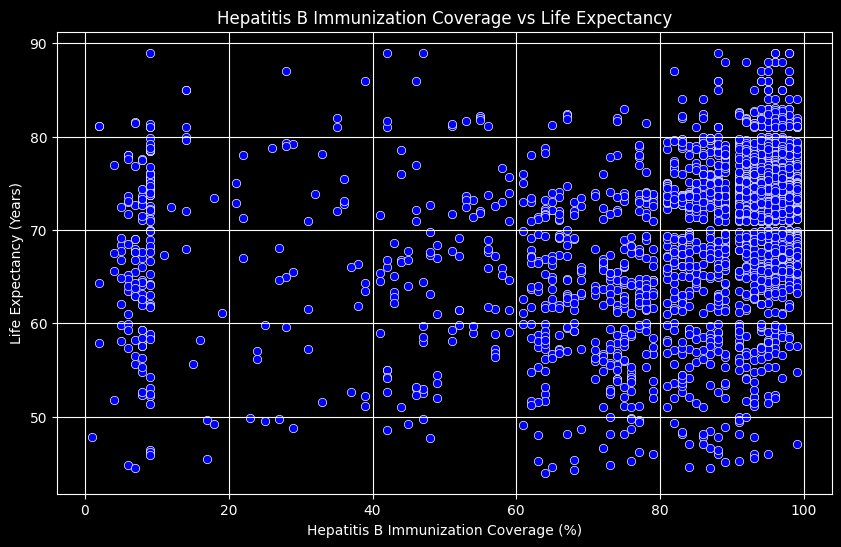

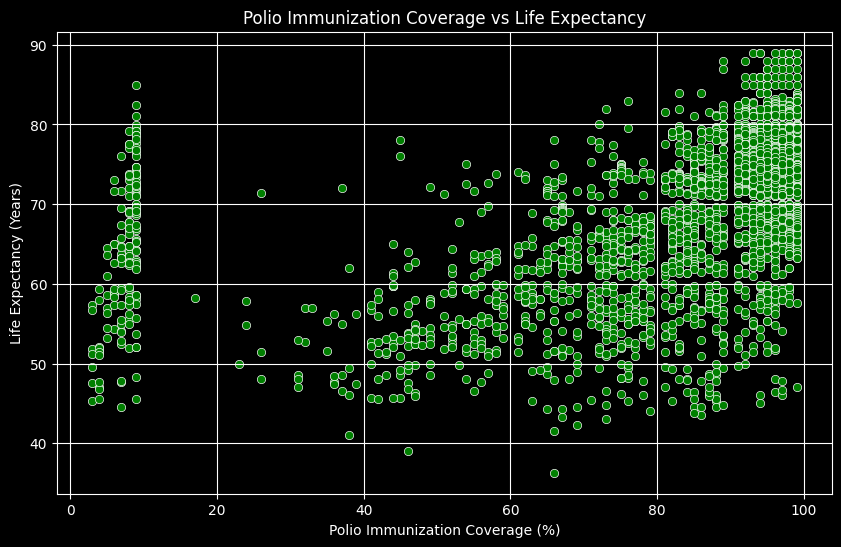

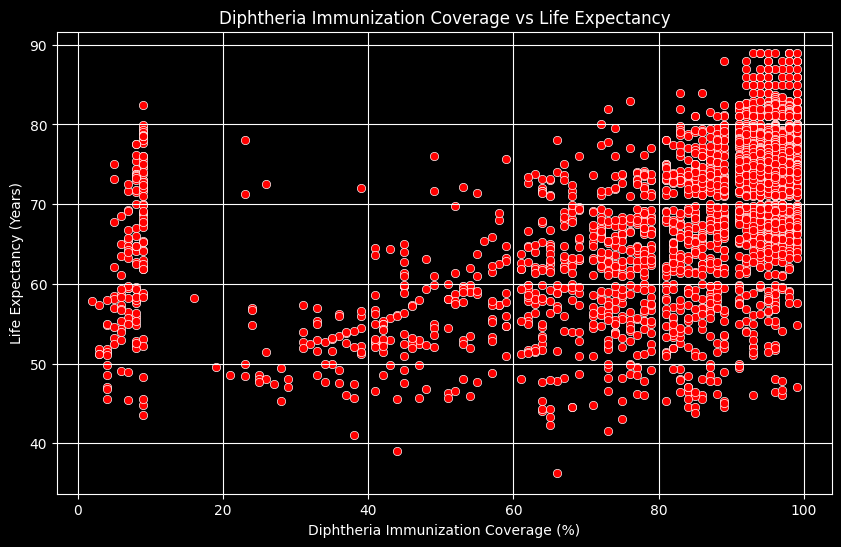

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/kaggle/input/life-expectancy-who-2024/Life Expectancy Data.csv')

# Scatter plot for Hepatitis B immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Hepatitis B', y='Life expectancy ', color='blue')
plt.title('Hepatitis B Immunization Coverage vs Life Expectancy')
plt.xlabel('Hepatitis B Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

# Scatter plot for Polio immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Polio', y='Life expectancy ', color='green')
plt.title('Polio Immunization Coverage vs Life Expectancy')
plt.xlabel('Polio Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

# Scatter plot for Diphtheria immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Diphtheria ', y='Life expectancy ', color='red')
plt.title('Diphtheria Immunization Coverage vs Life Expectancy')
plt.xlabel('Diphtheria Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()
